In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/data-prep-assignment/timeseries-residential-power-usage/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/data-prep-assignment/timeseries-residential-power-usage


In [ ]:
%ls


power_usage_2016_to_2020.csv  weather_2016_2020_daily.csv


In [ ]:
import pandas as pd

# Load the datasets
power_usage_df = pd.read_csv('power_usage_2016_to_2020.csv')
weather_df = pd.read_csv('weather_2016_2020_daily.csv')

# Display the first few rows of each dataset
power_usage_head = power_usage_df.head()
weather_head = weather_df.head()

power_usage_head

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [ ]:
weather_head

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


Check for Missing Values

In [ ]:
# Check for missing values in both datasets
power_usage_missing = power_usage_df.isnull().sum()
weather_missing = weather_df.isnull().sum()

power_usage_missing, weather_missing

(StartDate      0
 Value (kWh)    0
 day_of_week    0
 notes          0
 dtype: int64,
 Date           0
 Day            0
 Temp_max       0
 Temp_avg       0
 Temp_min       0
 Dew_max        0
 Dew_avg        0
 Dew_min        0
 Hum_max        0
 Hum_avg        0
 Hum_min        0
 Wind_max       0
 Wind_avg       0
 Wind_min       0
 Press_max      0
 Press_avg      0
 Press_min      0
 Precipit       0
 day_of_week    0
 dtype: int64)

# EDA

In [ ]:
# Compute descriptive statistics for both datasets
power_usage_stats = power_usage_df.describe()
weather_stats = weather_df.describe()

power_usage_stats

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [ ]:
weather_stats

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,15.726160,81.287371,71.752320,63.338273,66.615335,62.147423,56.939433,92.566366,74.365786,51.204897,15.855026,7.734987,1.375000,29.973840,29.903479,29.813273,0.157893,2.996134
std,8.800483,12.723409,12.490526,13.614699,12.279397,13.626795,15.246868,7.658203,11.700804,15.601436,4.842882,2.989969,2.500516,0.165958,0.160434,0.773583,0.658309,1.999029
min,1.000000,34.000000,27.600000,0.000000,18.000000,13.200000,0.000000,50.000000,31.500000,0.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000,0.000000
25%,8.000000,74.000000,63.175000,52.750000,61.000000,54.075000,45.750000,90.000000,67.400000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000
50%,16.000000,84.000000,74.300000,67.000000,70.000000,66.600000,62.000000,94.000000,75.000000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000
75%,23.000000,92.000000,82.000000,75.000000,76.000000,73.400000,70.000000,97.000000,82.700000,61.000000,18.000000,9.400000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000
max,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000


<ipython-input-8-5d2547c26709>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_power_usage = power_usage_df.groupby(power_usage_df['StartDate'].dt.date).sum()['Value (kWh)']


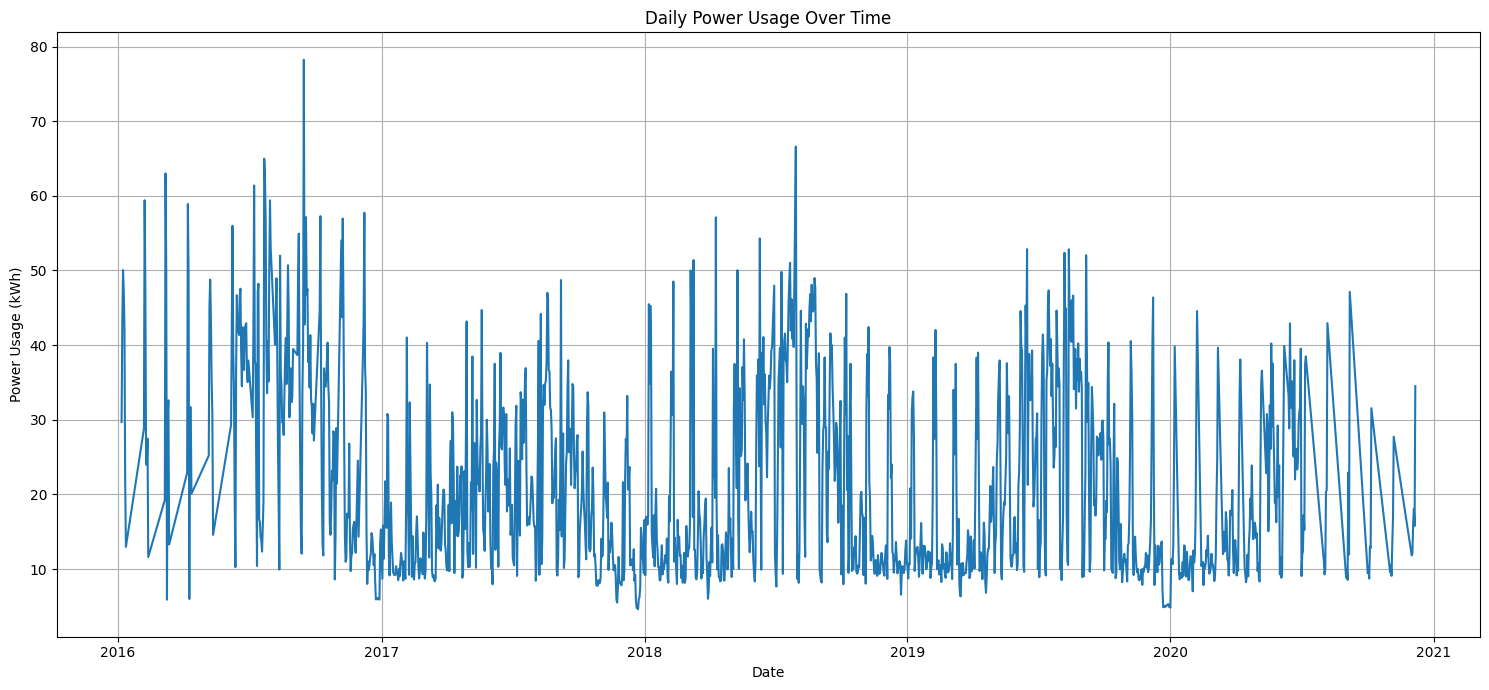

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'StartDate' column to datetime format
power_usage_df['StartDate'] = pd.to_datetime(power_usage_df['StartDate'])

# Aggregate power usage data on a daily basis
daily_power_usage = power_usage_df.groupby(power_usage_df['StartDate'].dt.date).sum()['Value (kWh)']

# Plot daily power usage over time
plt.figure(figsize=(15, 7))
daily_power_usage.plot(title='Daily Power Usage Over Time', xlabel='Date', ylabel='Power Usage (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

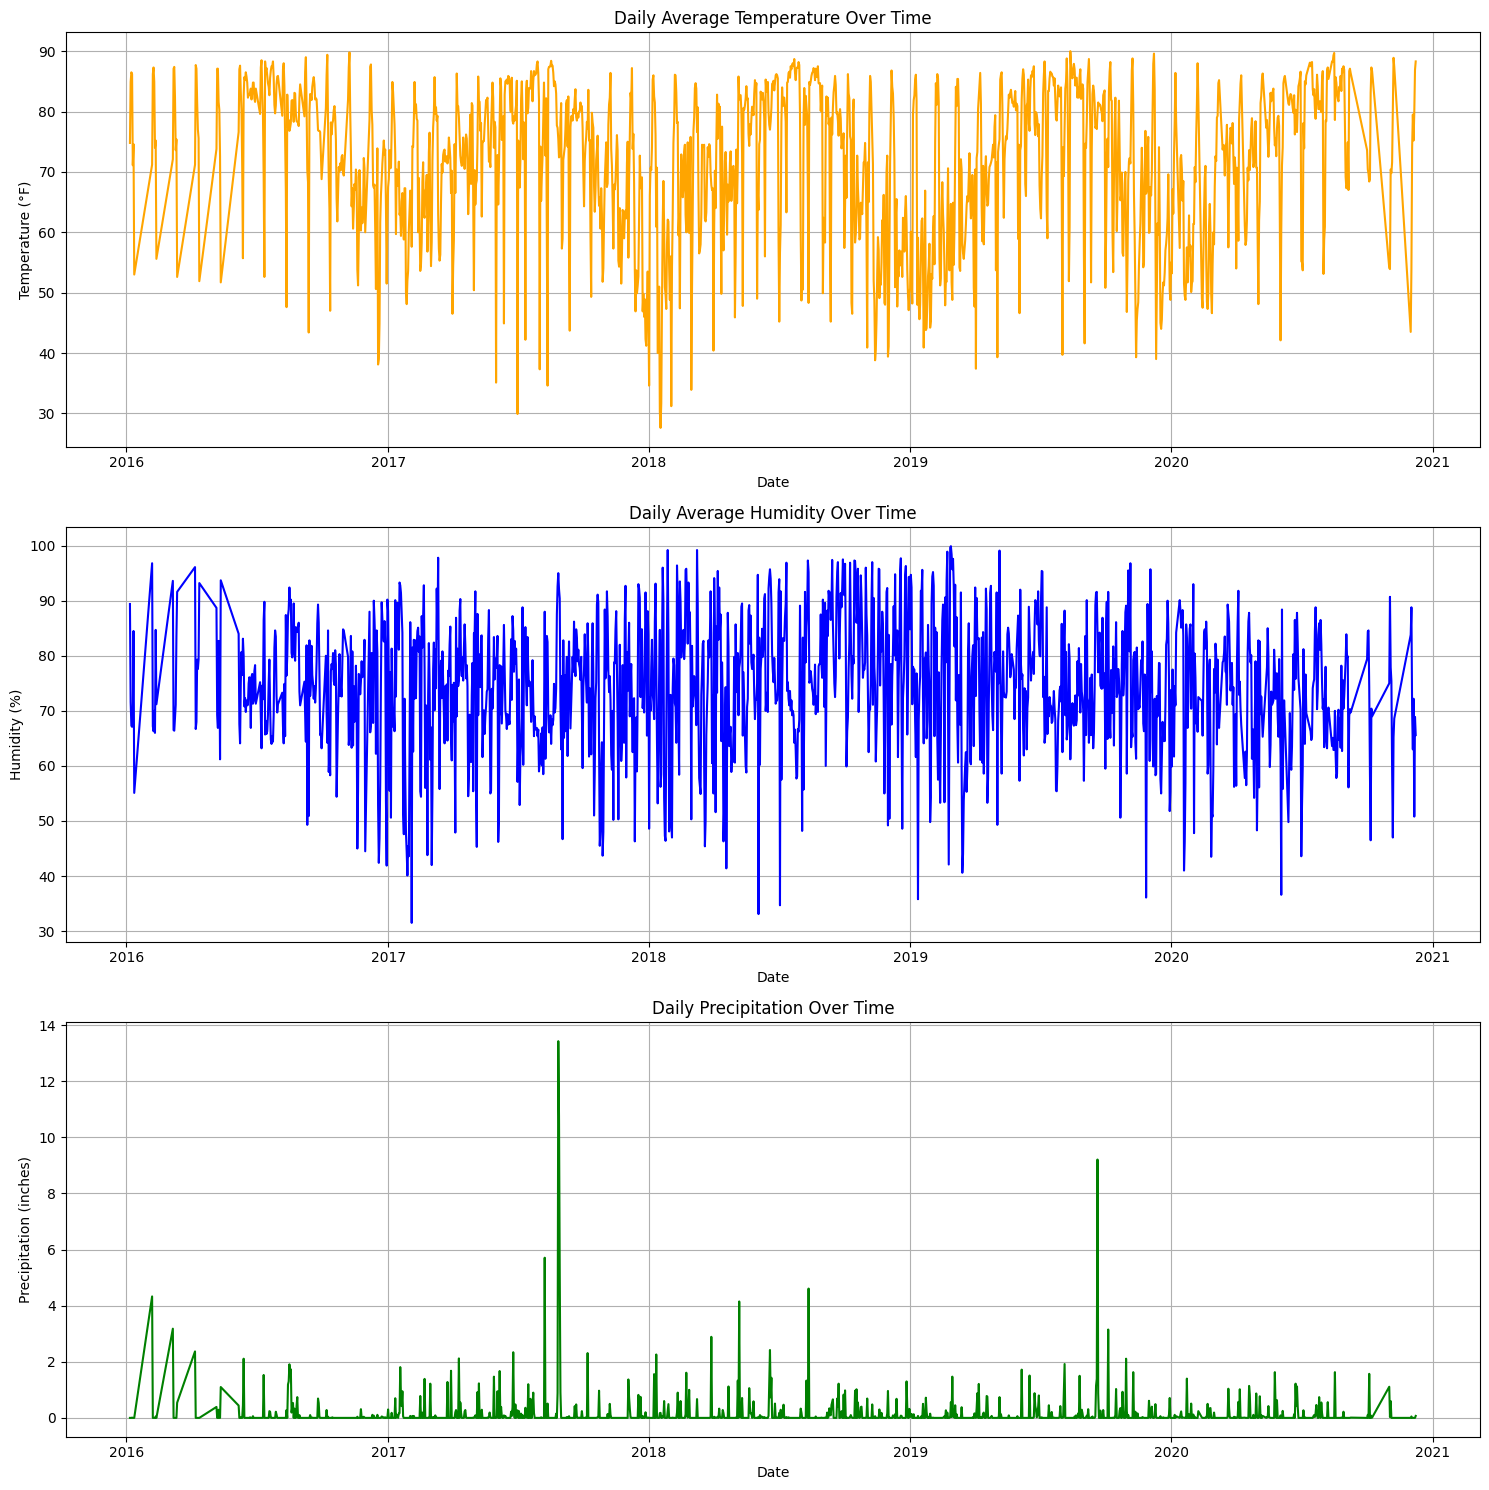

In [ ]:
# Sort based on chronological order rather than alphanumeric
weather_df = weather_df.sort_values(by='Date')

# Convert the 'Date' column to datetime format for the weather dataset
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Plotting weather parameters over time
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# Plot daily average temperature over time
ax[0].plot(weather_df['Date'], weather_df['Temp_avg'], color='orange', label='Average Temperature')
ax[0].set_title('Daily Average Temperature Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Temperature (°F)')
ax[0].grid(True)

# Plot daily average humidity over time
ax[1].plot(weather_df['Date'], weather_df['Hum_avg'], color='blue', label='Average Humidity')
ax[1].set_title('Daily Average Humidity Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Humidity (%)')
ax[1].grid(True)

# Plot daily precipitation over time
ax[2].plot(weather_df['Date'], weather_df['Precipit'], color='green', label='Precipitation')
ax[2].set_title('Daily Precipitation Over Time')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Precipitation (inches)')
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Aggregate power usage data on a daily basis for merging
daily_power_usage_df = daily_power_usage.reset_index()
daily_power_usage_df.columns = ['Date', 'Total_daily_power_usage']

# Convert the 'Date' column in daily_power_usage_sorted_df to datetime format
daily_power_usage_df['Date'] = pd.to_datetime(daily_power_usage_df['Date'])

# Merge the datasets again
merged_df = pd.merge(daily_power_usage_df, weather_df, on='Date', how='inner')

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Extract correlations with 'Total_daily_power_usage'
power_weather_correlations = correlation_matrix['Total_daily_power_usage'].drop('Total_daily_power_usage')

power_weather_correlations

<ipython-input-10-2650ce1eeba6>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


Day           -0.058705
Temp_max       0.710673
Temp_avg       0.720178
Temp_min       0.705234
Dew_max        0.606610
Dew_avg        0.634184
Dew_min        0.645126
Hum_max        0.100471
Hum_avg       -0.022245
Hum_min       -0.075223
Wind_max      -0.049319
Wind_avg      -0.209835
Wind_min      -0.136839
Press_max     -0.385739
Press_avg     -0.291159
Press_min     -0.044568
Precipit      -0.029940
day_of_week    0.045454
Name: Total_daily_power_usage, dtype: float64

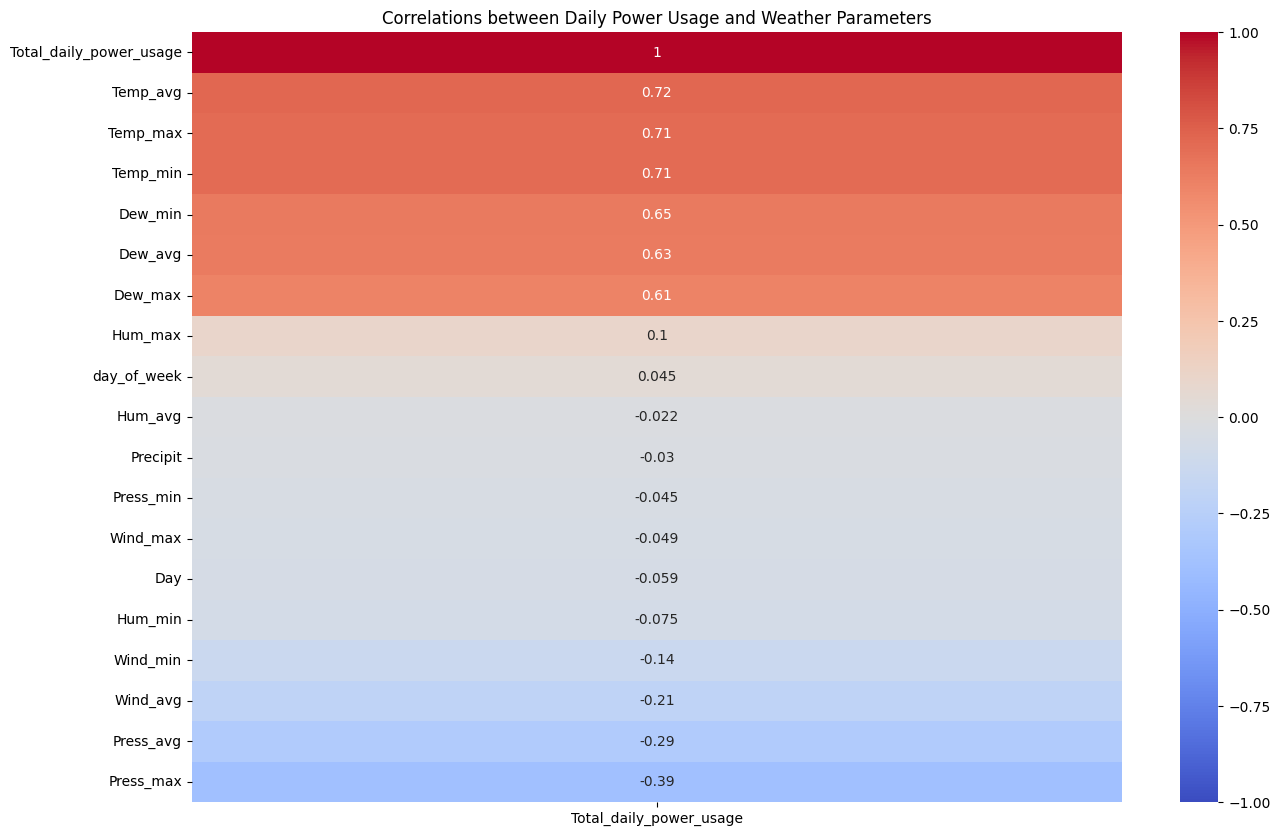

In [ ]:
import seaborn as sns

# Plot the heatmap for correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[['Total_daily_power_usage']].sort_values(by='Total_daily_power_usage', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations between Daily Power Usage and Weather Parameters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


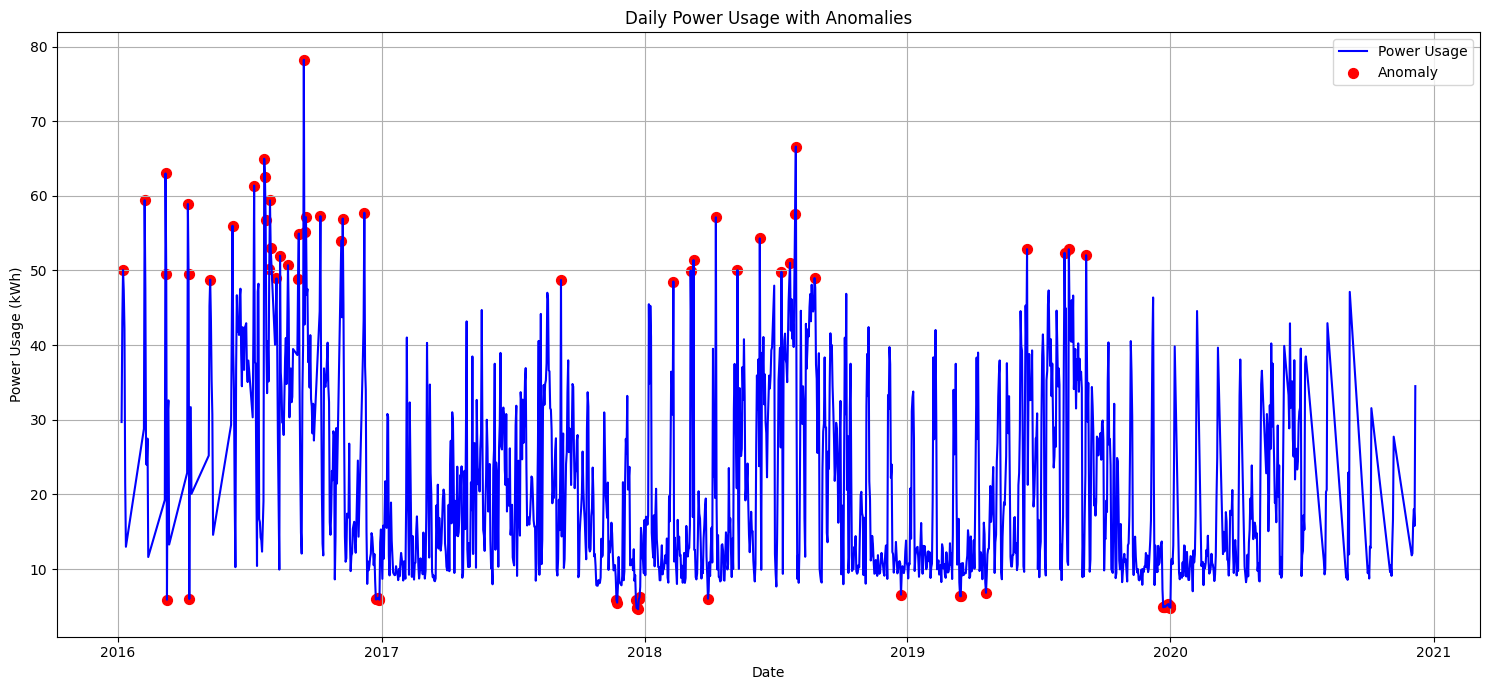

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the 'Total_daily_power_usage' feature
merged_df['anomaly'] = iso_forest.fit_predict(merged_df[['Total_daily_power_usage']])

# Plot the power usage and anomalies
plt.figure(figsize=(15, 7))
plt.plot(merged_df['Date'], merged_df['Total_daily_power_usage'], label='Power Usage', color='blue')
plt.scatter(merged_df[merged_df['anomaly'] == -1]['Date'],
            merged_df[merged_df['anomaly'] == -1]['Total_daily_power_usage'],
            color='red', label='Anomaly', s=50)
plt.title('Daily Power Usage with Anomalies')
plt.xlabel('Date')
plt.ylabel('Power Usage (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
cols_to_standardize = merged_df.columns.difference(['Date', 'anomaly'])

# Initialize the standard scaler
scaler = StandardScaler()

# Standardize the columns
merged_df[cols_to_standardize] = scaler.fit_transform(merged_df[cols_to_standardize])

# Display the first few rows of the standardized dataset
merged_df.head()

,Date,Total_daily_power_usage,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,...,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,anomaly
0,2016-01-06,0.656472,-1.664405,0.333147,0.283206,0.378948,0.626904,0.706502,0.623570,0.952177,...,0.865406,1.051242,0.575666,-0.55311,-1.059787,-0.655278,-0.145816,-0.239658,-0.498915,1
1,2016-01-07,1.724170,-1.664405,1.044725,1.095177,0.972040,0.788916,0.896551,1.017681,0.177612,...,-0.025576,-0.597722,-0.688091,-0.55311,-0.462061,-0.037915,-0.018747,-0.239658,0.001336,1
2,2016-01-08,2.268865,-1.664405,1.281918,1.223806,0.897904,0.788916,0.845384,0.689255,0.435800,...,-0.916557,0.845121,-0.588321,-0.55311,0.135665,-0.037915,0.108323,-0.239658,0.501587,-1
3,2016-01-09,2.055579,-1.664405,1.202853,1.199688,1.120313,0.707910,0.845384,0.886311,-0.596953,...,-0.343783,-0.597722,-0.488550,-0.55311,-1.059787,-0.655278,-0.145816,-0.224685,1.001838,1
4,2016-01-10,1.647057,-1.664405,0.016890,-0.014249,-0.140008,-0.183156,-0.170648,0.032404,-0.338764,...,-0.407425,-1.628324,-1.486254,-0.55311,0.135665,-0.037915,0.108323,-0.239658,1.502089,1


Feature Importance

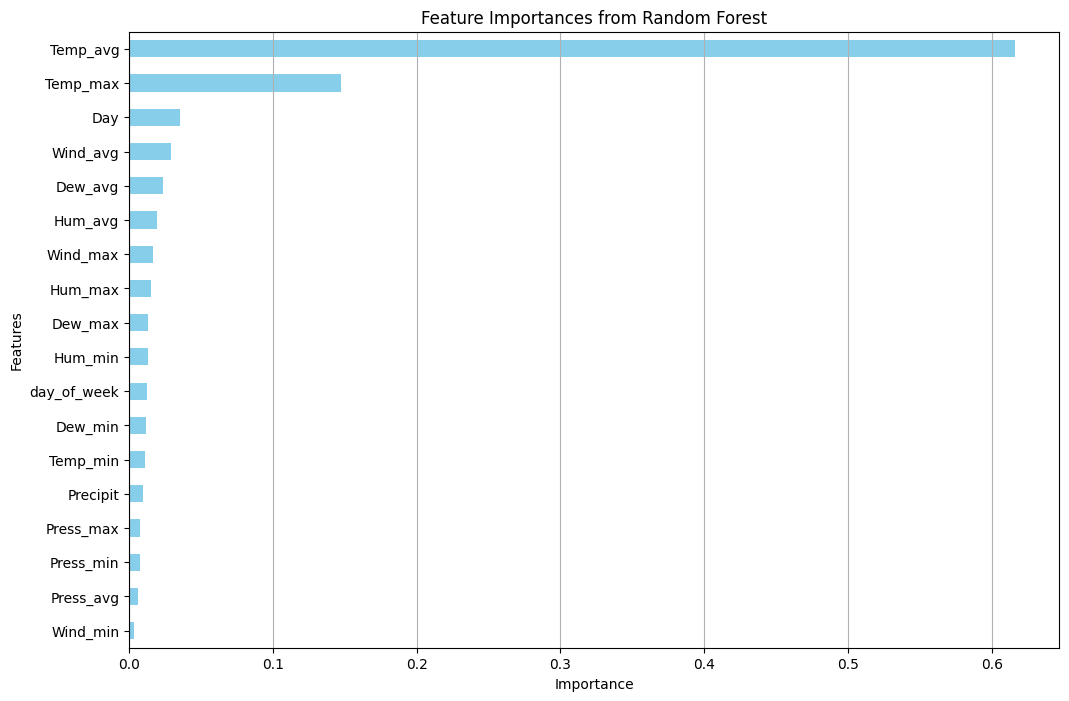

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the features and target variable
X = merged_df.drop(columns=['Date', 'Total_daily_power_usage', 'anomaly'])
y = merged_df['Total_daily_power_usage']

# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and visualize the feature importances
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


# Model Training


Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1198, 18), (300, 18), (1198,), (300,))

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the testing set
lr_predictions = lr.predict(X_test)

# Calculate the MAE for the Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)

lr_mae

0.5192649807129939

Random Forest

In [ ]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
rf_predictions = rf.predict(X_test)

# Calculate the MAE for the Random Forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)

rf_mae

0.34758112662192714

Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predict on the testing set
gb_predictions = gb.predict(X_test)

# Calculate the MAE for the Gradient Boosting model
gb_mae = mean_absolute_error(y_test, gb_predictions)

gb_mae

0.3537523608268001

Ensemble Model

In [ ]:
from sklearn.linear_model import LinearRegression

# First-level predictions
first_level_predictions = pd.DataFrame({
    'LinearRegression': lr.predict(X_test),
    'RandomForest': rf.predict(X_test),
    'GradientBoosting': gb.predict(X_test)
})

# Initialize and train the meta-model
meta_model = LinearRegression()
meta_model.fit(first_level_predictions, y_test)

# Predict using the meta-model
stacked_predictions = meta_model.predict(first_level_predictions)

# Calculate the MAE for the stacked model
stacked_mae = mean_absolute_error(y_test, stacked_predictions)

stacked_mae

0.3433858708685373